In [31]:
import sys
import pandas as pd
import pylab as plt
sys.path.append('ete')
from ete3 import Tree, NodeStyle, TreeStyle, AttrFace

In [32]:
def set_tiplabels(t, labelmap):
    for l in t.iter_leaves():
        #print (l.name)
        if l.name in labelmap:            
            l.name = labelmap[l.name]
    return    

def delete_nodes(t, names):
    for l in t.iter_leaves():        
        if l.name in names:          
            l.delete()   
            
def format_nodes(t):
    for n in t.traverse(): 
        ns = NodeStyle()
        ns["size"] = 0
        n.set_style(ns)
        
def color_leaves(t, colors):
    for l in t.iter_leaves():  
        if l.name in colors:
            clr = colors[l.name]
        else:
            clr='black'
        #print (clr)
        # create a new label with a color attribute
        #N = AttrFace("name", fgcolor=clr)
        #l.add_face(N, 1, position='aligned')
        ns = NodeStyle()
        ns["size"] = 12
        ns["fgcolor"] = clr
        l.set_style(ns)
        
def get_colormap(values):
    labels = values.unique()
    cmap = plt.cm.get_cmap('Set1')    
    colors=qcolors
    #clrs = {labels[i]:cmap(float(i)/(len(labels))) for i in range(len(labels))}
    clrs = dict(list(zip(labels,colors)))
    return clrs    

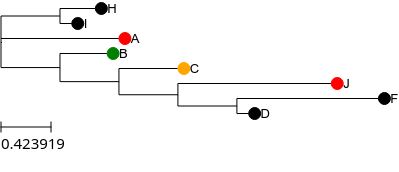

In [38]:
#t = Tree()
#t.populate(12)
#t = Tree('RAxML_bipartitions.variants')
#labelmap = {'mapped/3_S57_L001.bam':'a','mapped/6_S7_L001.bam':'b'}
#set_tiplabels(t,labelmap)

def test_tree():
    t = Tree( "((H:0.3,I:0.1):0.5, A:1, (B:0.4,(C:0.5,(J:1.3, (F:1.2, D:0.1):0.5):0.5):0.5):0.5);" )
    ts = TreeStyle()
    #ts.mode = "c"
    #ts.arc_start = -180 # 0 degrees = 3 o'clock
    #ts.arc_span = 180
    ts.show_leaf_name = True
    #ts.show_branch_length = True
    #ts.show_branch_support = True
    ts.scale =  220
    format_nodes(t)    
    colors = {'A':'red','B':'green','C':'orange','J':'red'}    
    color_leaves(t, colors)
    #t.render("tree.png", w=500, units="mm", tree_style=ts)
    t.render("%%inline", tree_style=ts)
    return t

t = test_tree()
#print (t)
t.render("%%inline", tree_style=ts)

In [44]:
qcolors = ['Red','Blue','Orange','Purple','Green','Yellow','Pink','darkred','Brown','darkblue','Magenta','Cyan']

#metadata
m1 = pd.read_csv('viktor/MAP-Metadata-Formatted-May19.csv')
m1['country'] = 'Ireland'
m2 = pd.read_csv('viktor/Bryant 2016 Table S1.csv')
#print (m1[:5])
print (m2[m2['Country of origin']=='Faroe Islands'])
#map1 = dict(zip(m1.AliquotFormat,m1['Herd Location']))
map1 = dict(zip(m1.AliquotFormat,m1.country))
map2 = dict(zip(m2.Accession,m2['Country of origin']))

cdict = get_colormap(m2['Country of origin']) 

  Reference No  SnaB1 profile Spe1 profile  INMV    No. TR IS1311 LSP20  \
8    MAPMRI008           11.0            9  70.0  71331118      S     -   

  LSPA4II gyrA/B   Host Country of origin Area of origin Date of isolation  \
8       +      I  Sheep     Faroe Islands            NaN             1979?   

    Comments  Accession Secondary Accession  
8  Pigmented  ERR026789           ERR038002  


In [ ]:
#t = Tree('RAxML_bestTree.variants')
t = Tree('viktor/RAxML_bipartitions.RaxML-R_30-01-20')

for l in t.iter_leaves():    
    l.name = l.name[1:].split('_')[0]

delete_nodes(t, ['ERR266516','ERR266517'])
n = t.get_common_ancestor(['ERR037962','ERR038000'])
desc = n.get_descendants()
for l in desc:
    l.delete()
#n.add_features(collapsed=True)
#n.img_style['draw_descendants'] = False

set_tiplabels(t,map1)
set_tiplabels(t,map2)
format_nodes(t)
color_leaves(t, cdict)

ts = TreeStyle()
ts.mode = "c"
ts.scale =  20000
# order the subtrees in ascending order
#t.ladderize(1)
#t.show(tree_style=ts)
t.render("tree.png", dpi=100, tree_style=ts)
t.render("%%inline", tree_style=ts)
#t.show(tree_style=ts)